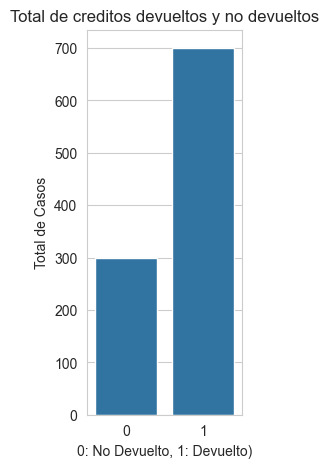

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración básica para visualización
sns.set_style("whitegrid")

# 1. Cargar el dataset de la práctica
database = pd.read_csv('credit_practice_dataset.csv')

## 2.1 Distribución de los Datos
plt.figure(figsize=(2, 5))
sns.countplot(x='returned_credit', data=database) # Gráfico de barras para la variable creditos devueltos
plt.title('Total de creditos devueltos y no devueltos')
plt.xlabel('0: No Devuelto, 1: Devuelto)')
plt.ylabel('Total de Casos')
plt.show()


--- Análisis de Distribución en Histogramas ---


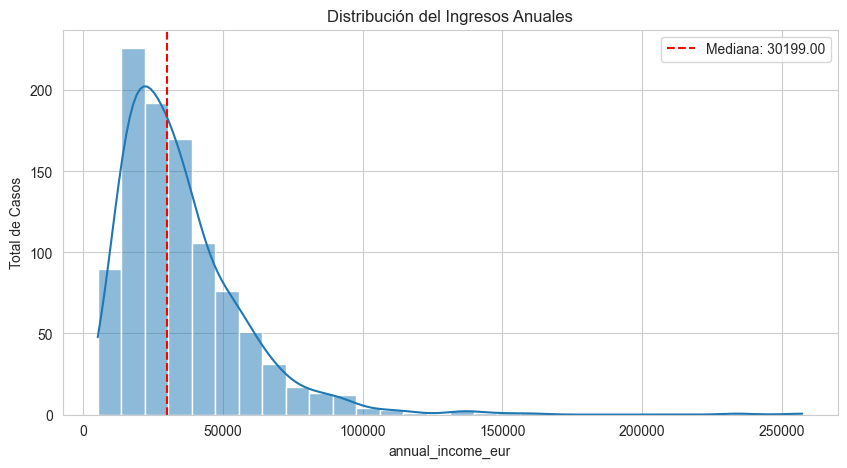

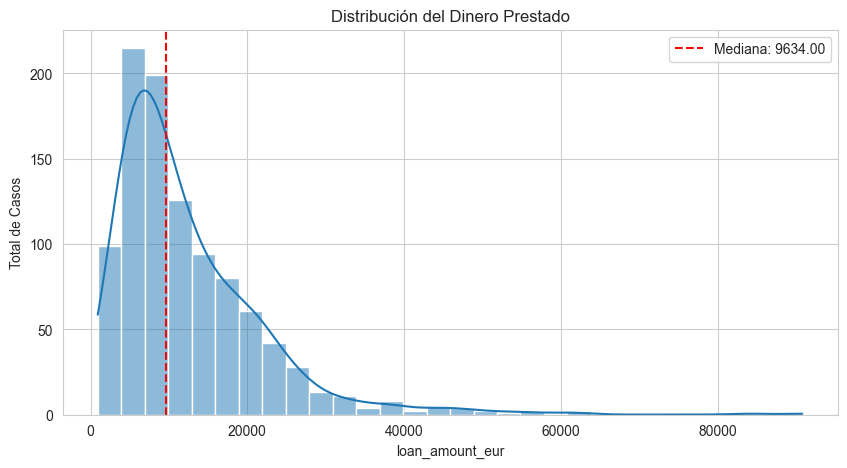

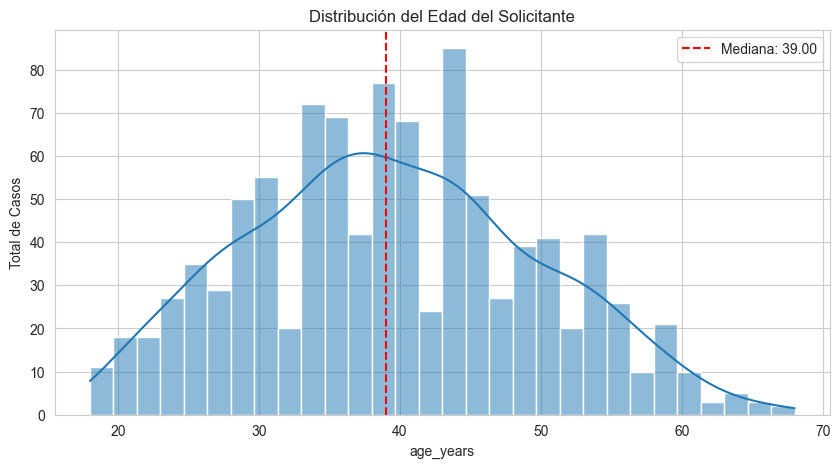

In [ ]:
## 2.2 Distribución de Variables Numéricas (Solo Histogramas/Densidad)
numeric_vars = ['annual_income_eur', 'loan_amount_eur', 'age_years']
titulos = {'annual_income_eur': 'Ingresos Anuales', 'loan_amount_eur': 'Dinero Prestado', 'age_years': 'Edad del Solicitante'}
print("--- Análisis de Distribución en Histogramas ---")

for col in numeric_vars:
    plt.figure(figsize=(10, 5))
    # Histograma con Gráfico de Densidad (KDE)
    sns.histplot(database[col], kde=True, bins=30)
    
    # Añadimos una línea vertical para la mediana para mejor discusión
    median_val = database[col].median()
    plt.axvline(median_val, color='red', linestyle='--', label=f'Mediana: {median_val:.2f}')
    
    plt.title(f'Distribución del {titulos[col]}')
    plt.xlabel(col)
    plt.ylabel('Total de Casos')
    plt.legend()
    plt.show()
    

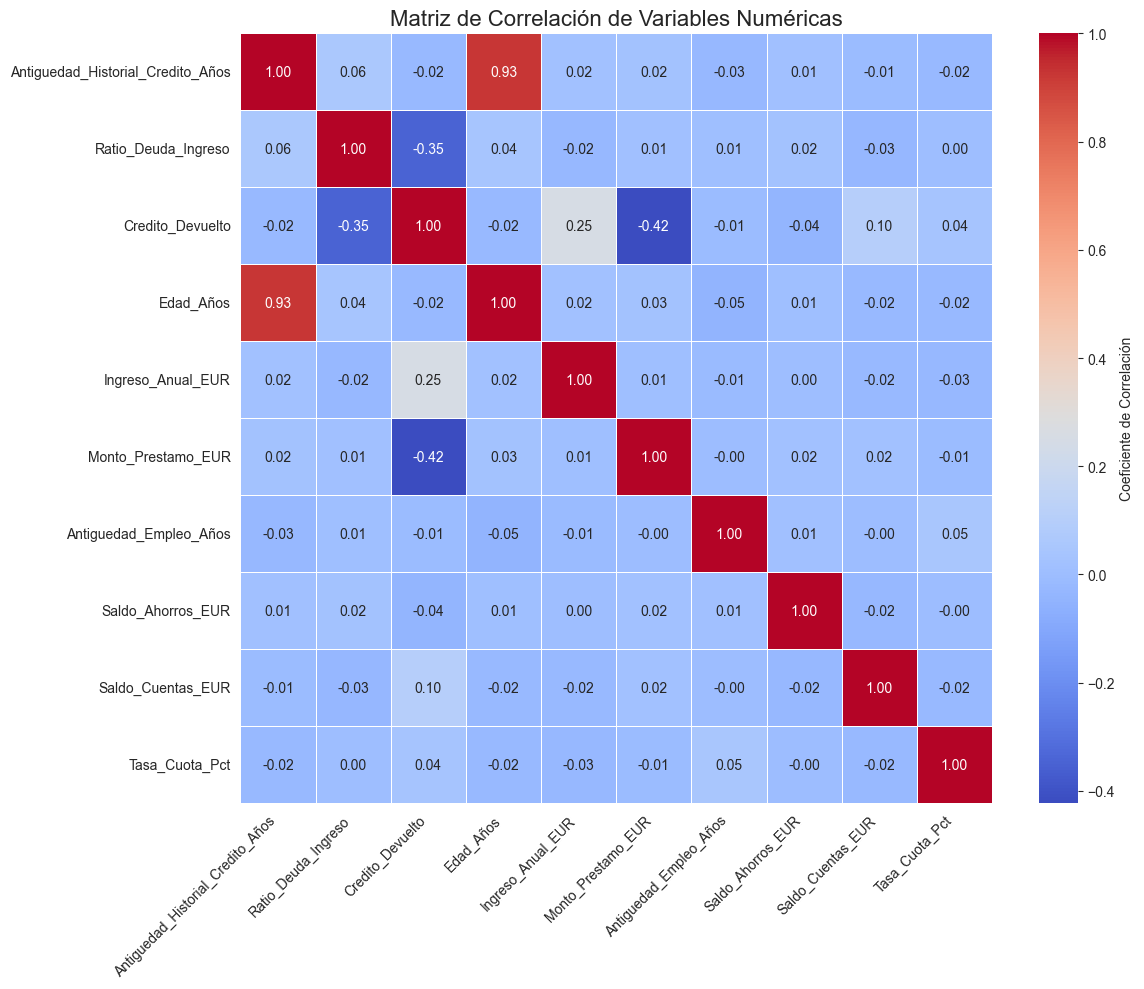

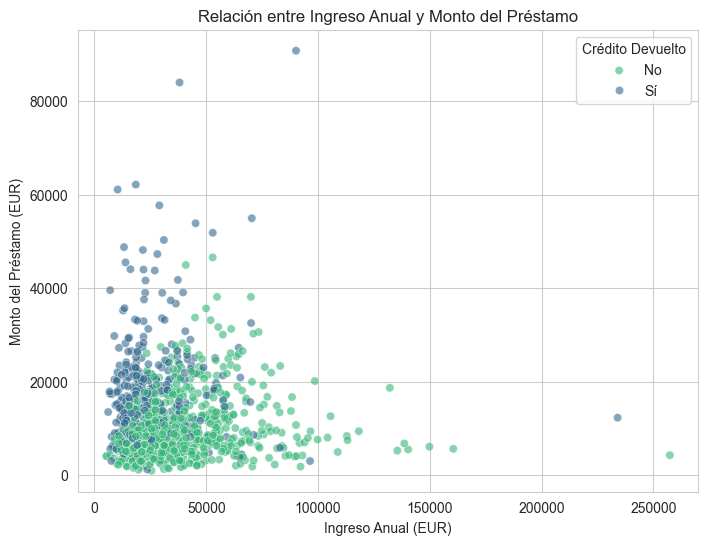

In [ ]:
## 1.3.1 Matriz de Correlación
numeric_vars = ['credit_history_length_years', 'debt_to_income_ratio', 'returned_credit',
                         'age_years', 'annual_income_eur', 'loan_amount_eur', 
                         'employment_length_years', 'savings_balance_eur', 
                         'checking_balance_eur', 'installment_rate_pct'] 

titulos = {
    'age_years': 'Edad_Años',
    'annual_income_eur': 'Ingreso_Anual_EUR',
    'loan_amount_eur': 'Monto_Prestamo_EUR',
    'employment_length_years': 'Antiguedad_Empleo_Años',
    'savings_balance_eur': 'Saldo_Ahorros_EUR',
    'checking_balance_eur': 'Saldo_Cuentas_EUR',
    'installment_rate_pct': 'Tasa_Cuota_Pct',
    'credit_history_length_years': 'Antiguedad_Historial_Credito_Años',
    'debt_to_income_ratio': 'Ratio_Deuda_Ingreso',
    'returned_credit': 'Credito_Devuelto'
}

#Renombrar las columnas en una copia temporal para la matriz de correlación
df_corr = database[numeric_vars].rename(columns=titulos)

#Cálculo de la Correlación con los nombres en español
correlation_matrix = df_corr.corr()

#Visualización de la Matriz de Correlación (Mapa de Calor)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=.5, 
            cbar_kws={'label': 'Coeficiente de Correlación'})

plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

#Gráfico de Dispersión (ejemplo de correlación) con nombres traducidos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_corr['Ingreso_Anual_EUR'], 
                y=df_corr['Monto_Prestamo_EUR'], 
                hue=df_corr['Credito_Devuelto'], 
                palette='viridis', 
                alpha=0.6)

plt.title('Relación entre Ingreso Anual y Monto del Préstamo')
plt.xlabel('Ingreso Anual (EUR)')
plt.ylabel('Monto del Préstamo (EUR)')
plt.legend(title='Crédito Devuelto', labels=['No', 'Sí'])
plt.show()

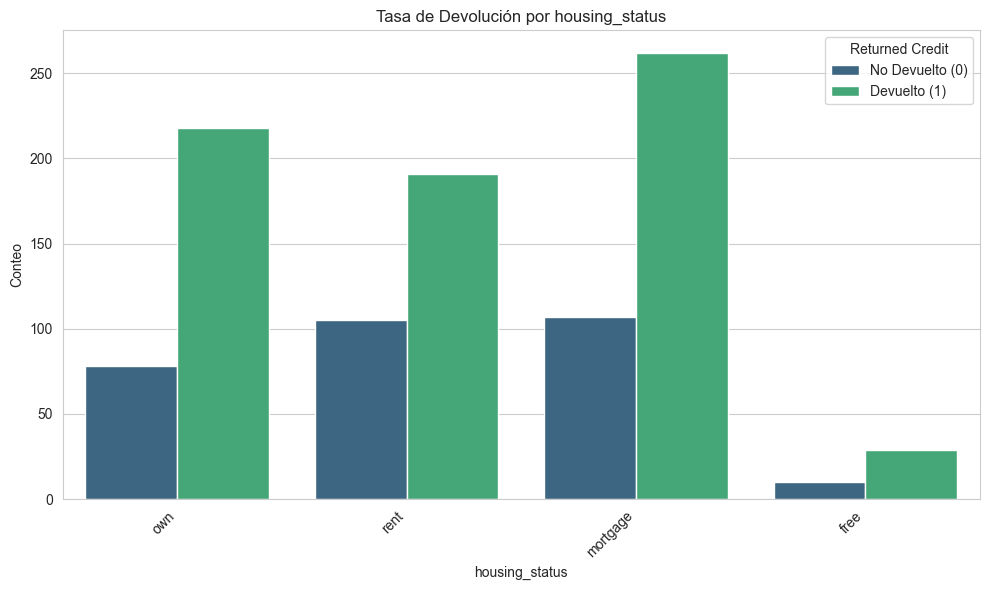

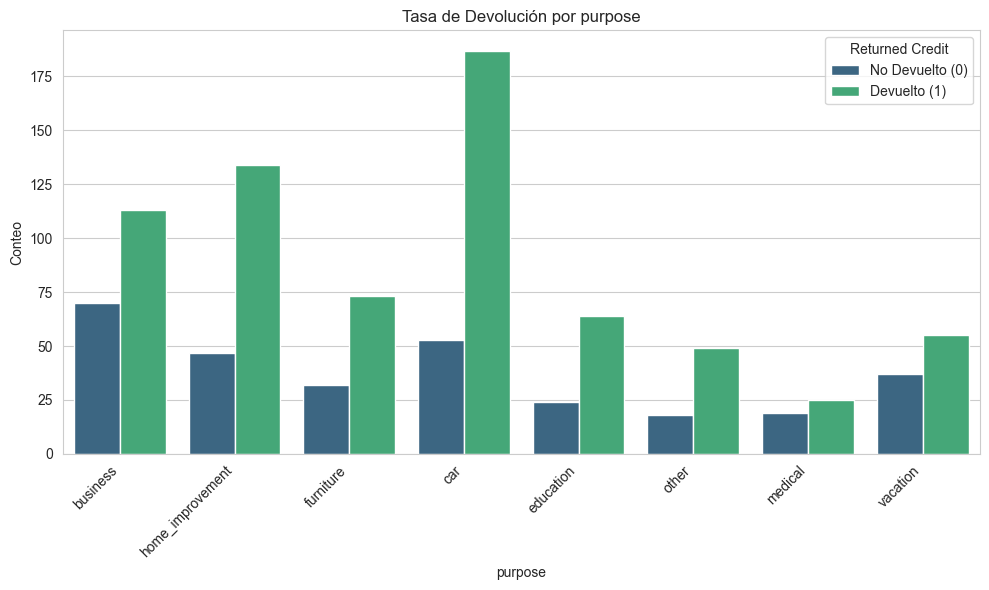

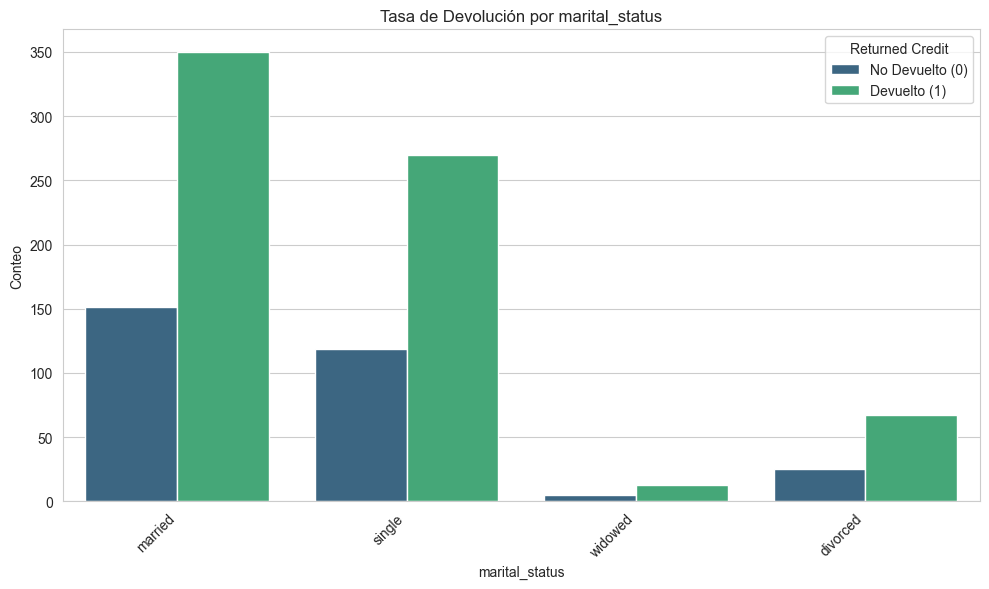

In [ ]:
## 3.2 Impacto de Variables Categóricas en 'returned_credit'
categorical_vars = ['housing_status', 'purpose', 'marital_status']

for col in categorical_vars:
    plt.figure(figsize=(10, 6))
    # Gráfico de barras agrupadas mostrando proporciones (normalize=True)
    sns.countplot(x=col, hue='returned_credit', data=database, palette='viridis')
    plt.title(f'Tasa de Devolución por {col}')
    plt.xlabel(col)
    plt.ylabel('Conteo')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Returned Credit', labels=['No Devuelto (0)', 'Devuelto (1)'])
    plt.tight_layout()
    plt.show()